# Lab 1, COMP3014J, Random Numbers


This Lab is a jupyter notebook which allows you to directly interact with
the code so that you can see the effect of any changes you may like to make.

Author: Nima Afraz, UCD

Step 1: We import two libraries. 
1- Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.
2- NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

In [88]:
import matplotlib.pyplot as plt
import numpy as np

We create an array called 's' that includes 10 randomly generated numbers between 0 and 1 from the unfiform distribution.
https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html

In [89]:
s = np.random.uniform(low=0.0, high=1.0, size=10)
print (s)

[0.76278346 0.37530218 0.53398155 0.23855503 0.24180993 0.05825854
 0.86732465 0.73546045 0.86696022 0.21483828]


We create an array called 'uniform_random' that includes 1000000 randomly generated numbers between 0 and 1 from the unfiform distribution.
https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html

In [90]:
uniform_random = np.random.uniform(low=0.0, high=1.0, size=1000000)

We plot the generated random numbers as a histogram with 100 bins.

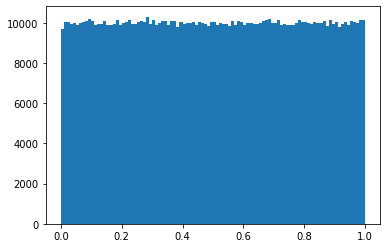

In [91]:
count, bins, ignored = plt.hist(uniform_random,100)
plt.show()


We create an array called 'normal_random' that includes 1000000 randomly generated numbers between 0 and 1 from the normal distribution.
https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

In [92]:
mu, sigma = 0.2, 0.9 # mean and standard deviation
normal_random = np.random.normal(mu, sigma, 1000000)

We plot the generated random numbers as a histogram with 100 bins.

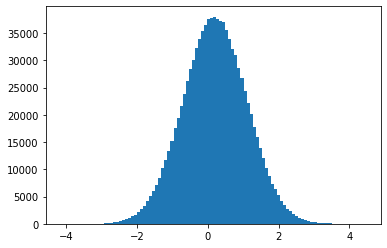

In [93]:
count, n_bins, ignored = plt.hist(normal_random,100)
plt.show()

We Draw the Probability Density Function (PDF)

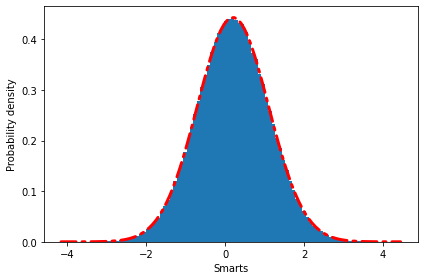

In [94]:
np.random.seed(19680801)


fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(normal_random, n_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, color='red', linewidth=3,
     linestyle=(0, (5, 2, 1, 2)), dash_capstyle='round')
# ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

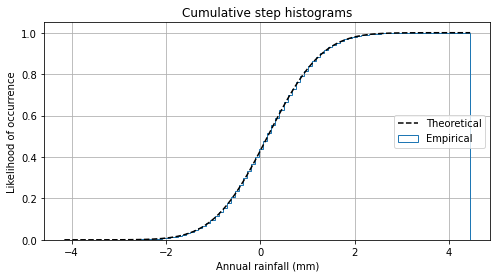

In [95]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(normal_random, n_bins, density=True, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the expected distribution.
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

# Plotting
ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')


# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Annual rainfall (mm)')
ax.set_ylabel('Likelihood of occurrence')

plt.show()


LCG Generator's Python implementation[1].
[1] https://physik.uni-graz.at/~pep/CompOriPhys/Python/LCG_histogram.py

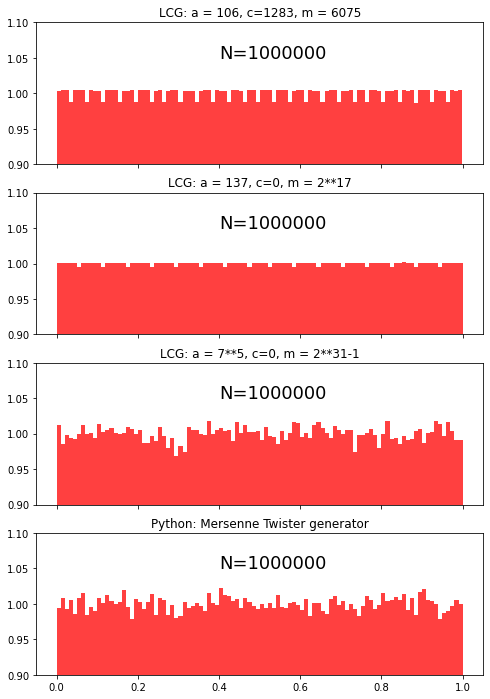

In [96]:
import numpy as np
import matplotlib.pyplot as plt
###################################################################
def seedLCG(initVal):
    global rand
    rand = initVal

def lcg(a,c,m):  # Linear congruential generator (LCG)
    global rand
    rand = (a*rand + c) % m
    return rand/float(m)

def my_rand(n,a,c,m):
    rand_num = np.zeros((n),float)
    for i in range(n):
        rand_num[i] =  lcg(a,c,m)
    return rand_num

### MAIN PROGRAM #################################################
# very simple set of parameters for LCG
a1  = 106
c1  = 1283
m1  = 6075
# other set of parameters for LCG
a2  = 137
c2  = 0
m2  = 2**17
# Park-Miller set of parameters for LCG
a3 = 7**5
c3 = 0
m3 = 2**31 - 1

seedLCG(123)

n  = 10**6

x1 = my_rand(n,a1,c1,m1)
x2 = my_rand(n,a2,c2,m2)
x3 = my_rand(n,a3,c3,m3)
x4 = np.random.rand(n)     # Python's built-in random number generator

# plot histograms
f,ax = plt.subplots(4,1,sharex=True,sharey=True,figsize=(8,12))
ax[0].hist(x1, 100, density=True, stacked=True, facecolor='red', alpha=0.75)
ax[1].hist(x2, 100, density=True, stacked=True, facecolor='red', alpha=0.75)
ax[2].hist(x3, 100, density=True, stacked=True, facecolor='red', alpha=0.75)
ax[3].hist(x4, 100, density=True, stacked=True, facecolor='red', alpha=0.75)

ax[0].set_title('LCG: a = 106, c=1283, m = 6075')
ax[1].set_title('LCG: a = 137, c=0, m = 2**17')
ax[2].set_title('LCG: a = 7**5, c=0, m = 2**31-1')
ax[3].set_title('Python: Mersenne Twister generator')
ax[0].set_ylim(0.90,1.10)
for i in range(0,4):
  ax[i].text(0.4,1.05,'N='+str(n), fontsize=18,color='black')

plt.savefig("LCG_histogram.pdf")
plt.show()

Wald-Wolfowitz Runs Test

In [97]:
# simple code to implement Runs
# test of randomnes

import random
import math
import statistics


def runsTest(l, l_median):
    runs, n1, n2 = 0, 0, 0

    # Checking for start of new run
    for i in range(len(l)):

        # no. of runs
        if (l[i] >= l_median and l[i - 1] < l_median) or \
                (l[i] < l_median and l[i - 1] >= l_median):
            runs += 1

        # no. of positive values
        if (l[i]) >= l_median:
            n1 += 1

        # no. of negative values
        else:
            n2 += 1

    runs_exp = ((2 * n1 * n2) / (n1 + n2)) + 1
    stan_dev = math.sqrt((2 * n1 * n2 * (2 * n1 * n2 - n1 - n2)) / \
                         (((n1 + n2) ** 2) * (n1 + n2 - 1)))

    z = (runs - runs_exp) / stan_dev

    return z


# Making a list of 100 random numbers
l = []
for i in range(100):
    l.append(random.random())
    
# l = x1

l_median = statistics.median(l)

Z = abs(runsTest(l, l_median))

print('Z-statistic= ', Z)


Z-statistic=  0.201017818278147


The Autocorrelation plot for the data is:


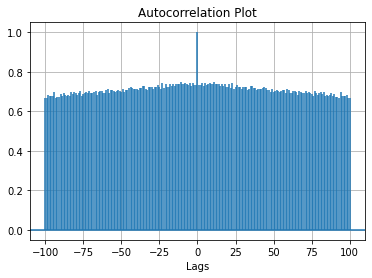

In [98]:
# Importing the libraries.
import matplotlib.pyplot as plt
import numpy as np

# Data for which we plot Autocorrelation.
data = np.array([12.0, 24.0, 7., 20.0,
				7.0, 22.0, 18.0,22.0,
				6.0, 7.0, 20.0, 13.0,
				8.0, 5.0, 8])

data = np.random.uniform(low=0.0, high=10000.0, size=1000)
data = np.random.rand(1000)
# Adding plot title.
plt.title("Autocorrelation Plot")

# Providing x-axis name.
plt.xlabel("Lags")

# Plotting the Autocorrelation plot.
plt.acorr(data, maxlags = 100)

# Displaying the plot.
print("The Autocorrelation plot for the data is:")
plt.grid(True)

plt.show()

Chi-Square Test

No handles with labels found to put in legend.


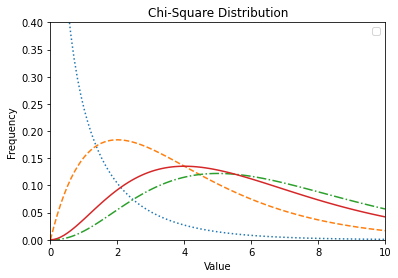

In [99]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
fig,ax = plt.subplots(1,1)

linestyles = [':', '--', '-.', '-']
deg_of_freedom = [1, 4, 7, 6]
for df, ls in zip(deg_of_freedom, linestyles):
  ax.plot(x, stats.chi2.pdf(x, df), linestyle=ls)

plt.xlim(0, 10)
plt.ylim(0, 0.4)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Chi-Square Distribution')

plt.legend()
plt.show()